<a href="https://colab.research.google.com/github/vohoanglong0107/github-slideshow/blob/ML_project/10_Intro_to_Neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Classification


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
# model = keras.models.Sequential()
# model.add(keras.layers.InputLayer(input_shape=[28, 28]))
# model.add(keras.layers.Dense(units = 300, activation= keras.activations.relu))
# model.add(keras.layers.Dense(units = 100, activation= keras.activations.relu))
# model.add(keras.layers.Dense(units = 10, activation= keras.activations.softmax))

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(units = 300, activation= keras.activations.relu),
  keras.layers.Dense(units = 100, activation= keras.activations.relu),
  keras.layers.Dense(units = 10, activation= keras.activations.softmax),                                 
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


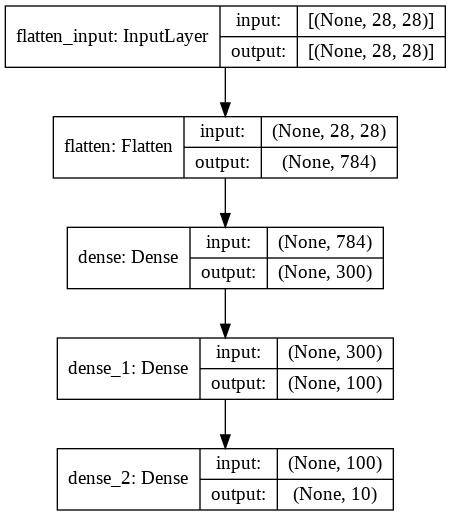

In [ ]:
keras.utils.plot_model(model, show_shapes= True)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0125 - accuracy: 0.6725 - val_loss: 0.5409 - val_accuracy: 0.8058
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5089 - accuracy: 0.8243 - val_loss: 0.4412 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4461 - accuracy: 0.8429 - val_loss: 0.4136 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4179 - accuracy: 0.8517 - val_loss: 0.4381 - val_accuracy: 0.8442
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4010 - accuracy: 0.8578 - val_loss: 0.3970 - val_accuracy: 0.8646
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3862 - accuracy: 0.8638 - val_loss: 0.3873 - val_accuracy: 0.8606
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3706 - accuracy: 0.8689 - val_loss: 0.3602 - val_accuracy:

In [ ]:
import pandas as pd

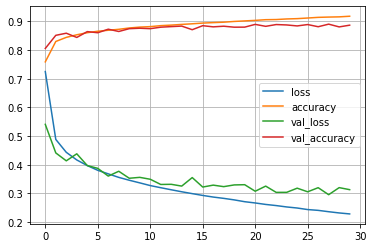

In [ ]:
pd.DataFrame(history.history).plot()
plt.grid()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3445 - accuracy: 0.8781


[0.34454816579818726, 0.8780999779701233]

# Regression


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
  keras.layers.InputLayer(input_shape = X_train.shape[1]),
  keras.layers.Dense(30, activation= keras.activations.relu),
  keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer= keras.optimizers.SGD(), loss = keras.losses.MeanSquaredError())

In [ ]:
history = model.fit(X_train, y_train, epochs = 30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 1.1284 - val_loss: 0.5736
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6240 - val_loss: 0.5112
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6803 - val_loss: 0.4754
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4662 - val_loss: 0.4512
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4445 - val_loss: 0.4696
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4489 - val_loss: 0.4325
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4333 - val_loss: 0.4277
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4167 - val_loss: 0.4152
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4014 - val_loss: 0.4135
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4092 - val_loss: 0.4159

In [ ]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 774us/step - loss: 0.3494


0.34935131669044495

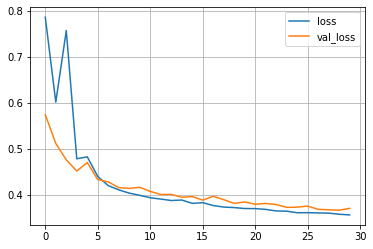

In [ ]:
pd.DataFrame(history.history).plot()
plt.grid()